# Customer Segmentation

### Here we segment customers based on Revenue ,Service Usage and Subscription type 

In [25]:
import pandas as pd
import numpy as np
from  sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import seaborn as sns

In [26]:
df = pd.read_csv("Encoded(3).csv")
revenue_features = ["MonthlyRevenue", "MonthlyMinutes", "TotalRecurringCharge", "DirectorAssistedCalls", "OverageMinutes"]

#### Segementation based on *Revenue* 

   CustomerID  Churn  MonthlyRevenue  MonthlyMinutes  TotalRecurringCharge  \
0     3000002      1           24.00           219.0                  22.0   
1     3000010      1           16.99            10.0                  17.0   
2     3000014      0           38.00             8.0                  38.0   
3     3000022      0           82.28          1312.0                  75.0   
4     3000026      1           17.14             0.0                  17.0   

   DirectorAssistedCalls  OverageMinutes  RoamingCalls  PercChangeMinutes  \
0                   0.25             0.0           0.0             -157.0   
1                   0.00             0.0           0.0               -4.0   
2                   0.00             0.0           0.0               -2.0   
3                   1.24             0.0           0.0              157.0   
4                   0.00             0.0           0.0                0.0   

   PercChangeRevenues  ...  MonthlyRevenue_Segment  MonthlyMinutes_S

/var/folders/gn/gf19qrsx0wd1shd7yvd056jh0000gn/T/ipykernel_55372/724628469.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=f'{feature}_Segment', data=df, palette='Set1')


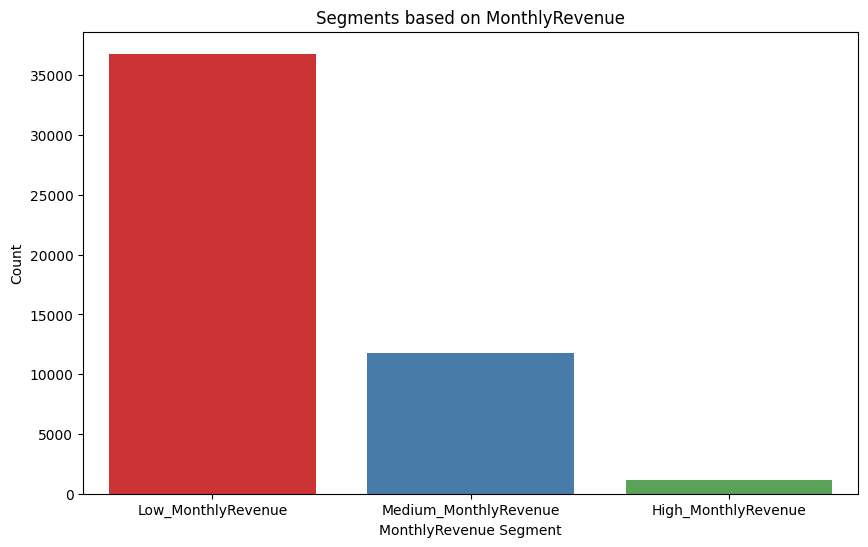

/var/folders/gn/gf19qrsx0wd1shd7yvd056jh0000gn/T/ipykernel_55372/724628469.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=f'{feature}_Segment', data=df, palette='Set1')


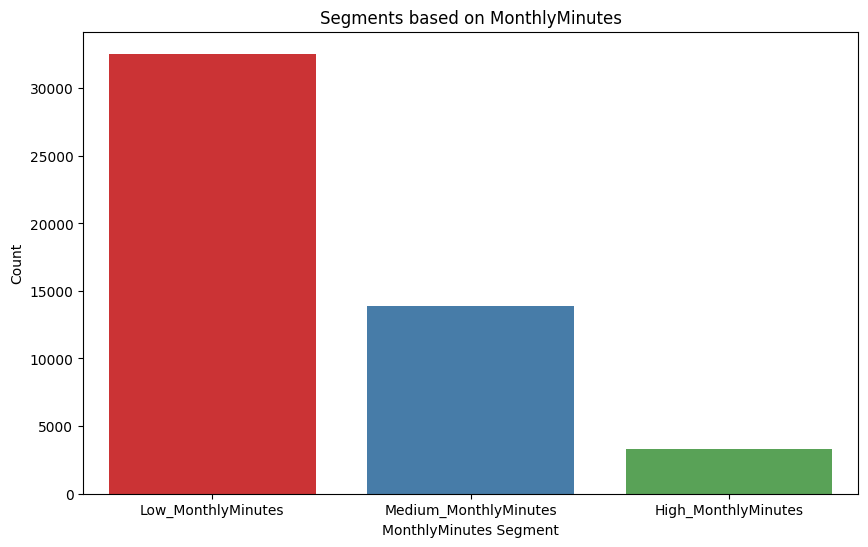

/var/folders/gn/gf19qrsx0wd1shd7yvd056jh0000gn/T/ipykernel_55372/724628469.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=f'{feature}_Segment', data=df, palette='Set1')


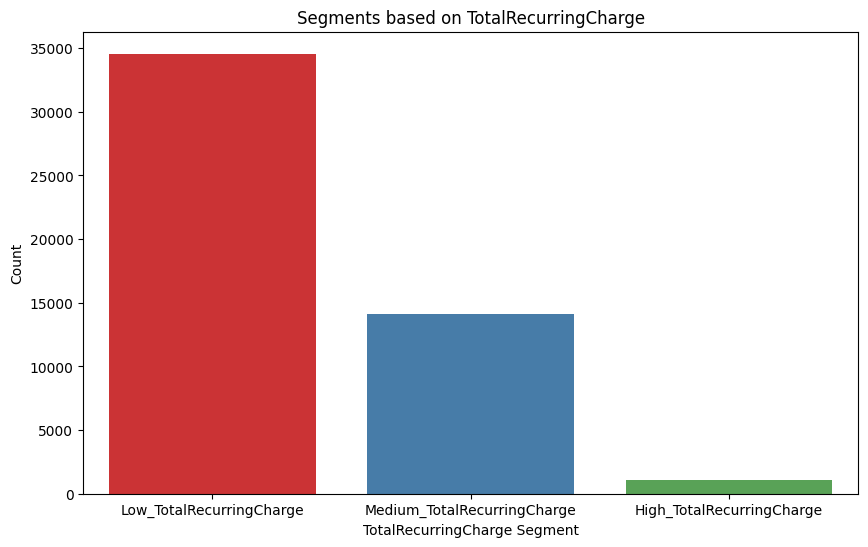

/var/folders/gn/gf19qrsx0wd1shd7yvd056jh0000gn/T/ipykernel_55372/724628469.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=f'{feature}_Segment', data=df, palette='Set1')


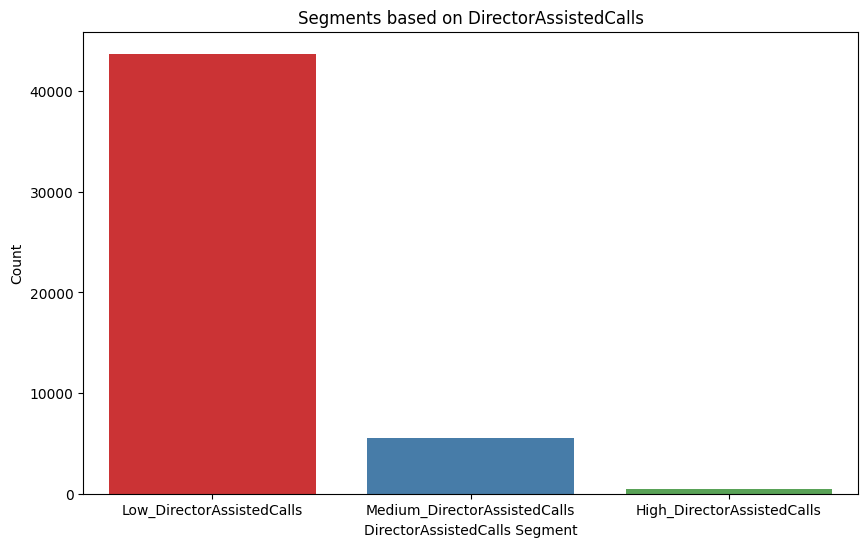

/var/folders/gn/gf19qrsx0wd1shd7yvd056jh0000gn/T/ipykernel_55372/724628469.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=f'{feature}_Segment', data=df, palette='Set1')


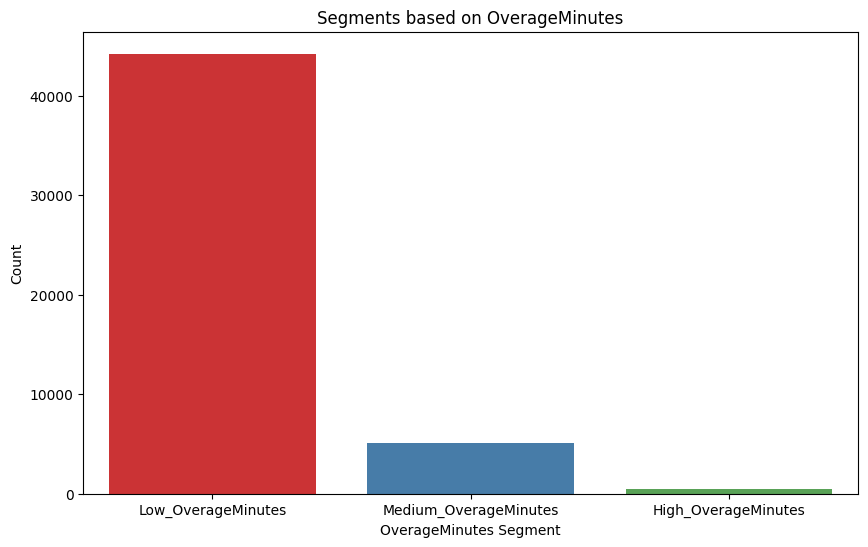


Segment counts for MonthlyRevenue:
MonthlyRevenue_Segment
Low_MonthlyRevenue       36808
Medium_MonthlyRevenue    11790
High_MonthlyRevenue       1154
Name: count, dtype: int64

Segment counts for MonthlyMinutes:
MonthlyMinutes_Segment
Low_MonthlyMinutes       32556
Medium_MonthlyMinutes    13899
High_MonthlyMinutes       3297
Name: count, dtype: int64

Segment counts for TotalRecurringCharge:
TotalRecurringCharge_Segment
Low_TotalRecurringCharge       34570
Medium_TotalRecurringCharge    14142
High_TotalRecurringCharge       1040
Name: count, dtype: int64

Segment counts for DirectorAssistedCalls:
DirectorAssistedCalls_Segment
Low_DirectorAssistedCalls       43714
Medium_DirectorAssistedCalls     5565
High_DirectorAssistedCalls        473
Name: count, dtype: int64

Segment counts for OverageMinutes:
OverageMinutes_Segment
Low_OverageMinutes       44221
Medium_OverageMinutes     5097
High_OverageMinutes        434
Name: count, dtype: int64


In [24]:
k = 3

# Initialize the scaler
scaler = StandardScaler()

# Function to apply KMeans clustering and label clusters as high, medium, and low
def kmeans_segmentation(data, feature, k=3):
    # Standardize the feature
    scaled_feature = scaler.fit_transform(data[[feature]])
    
    # Apply KMeans
    kmeans = KMeans(n_clusters=k, random_state=42)
    data[f'{feature}_Cluster'] = kmeans.fit_predict(scaled_feature)
    
    # Get cluster centers and sort them
    cluster_centers = kmeans.cluster_centers_.flatten()
    sorted_indices = np.argsort(cluster_centers)
    
    # Map sorted cluster indices to high, medium, and low
    cluster_labels = {sorted_indices[0]: f'Low_{feature}', sorted_indices[1]: f'Medium_{feature}', sorted_indices[2]: f'High_{feature}'}
    
    # Assign new labels
    data[f'{feature}_Segment'] = data[f'{feature}_Cluster'].map(cluster_labels)
    
    return data

# Apply segmentation to each feature
for feature in revenue_features:
    df = kmeans_segmentation(df, feature)

# Display the DataFrame with new segment columns
print(df.head())

# Visualize segments for each feature
for feature in revenue_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=f'{feature}_Segment', data=df, palette='Set1')
    plt.title(f'Segments based on {feature}')
    plt.xlabel(f'{feature} Segment')
    plt.ylabel('Count')
    plt.show()

# Optional: Analyze segment distribution
for feature in revenue_features:
    segment_col = f'{feature}_Segment'
    segment_counts = df[segment_col].value_counts()
    print(f'\nSegment counts for {feature}:')
    print(segment_counts)